In [3]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
import seaborn as sns
from collections import defaultdict
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline

In [4]:
# Reading in the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [ ]:
# Exploring the datasets

In [2]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
calendar.shape

(1393570, 4)

In [4]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [206]:
listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [67]:
unique_room_types = listings['room_type'].unique()

In [6]:
listings['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [7]:
listings.shape

(3818, 92)

In [8]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
reviews.shape

(84849, 6)

In [291]:
# Defining the three questions I found interesting that I have tried to answer in the following sections...

Question 1: What property types are most likely fetch a higher price per bed per night?

Question 2: What kind of amenities tend to be provided by the property owners depending on the room type?

Question 3: How do super hosts compare with the regular hosts?

Answer 1: -------------------------------------------------------------------------------------------

# Question 1: What property types are most likely fetch a higher price per bed per night?

We are choosing an exploratory approach to tackle this question using some descriptive statistics, essentially looking at the average cost per bed per night and seeing if some clear buckets emerge.

Steps:
1. Clean the price column as it is of String type and has other characters like $ etc..
2. Once we have the clean prices, next step is to find the mean price per night of each property type and sort them..
3. Analyze the results..


In [ ]:
def clean_price(cell1):
    
    cell_str = re.sub('[$,]','', cell1)
    cell_float = float(cell_str)
    return cell_float
    
listings['price_clean'] = listings.apply(lambda row: clean_price(row['price']), axis = 1)

In [225]:
listings.drop(['price'],axis=1)
listings['price_clean'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price_clean, dtype: float64

In [244]:
listings[['property_type','price_clean']].groupby(['property_type']).mean().sort_values(by=['price_clean'], ascending=False)

,price_clean
property_type,
Boat,282.375000
Condominium,151.109890
Loft,135.700000
House,132.351414
Townhouse,129.457627
Apartment,122.932670
Camper/RV,120.461538
Bungalow,115.615385
Bed & Breakfast,112.054054


# Findings thus far:
Treehouse seems to be go for cheaper compared to some other options. Regular accommodations like houses and townhouses seem to be expensive than they should be which is a bit counter-intuitive. But, that could likely be because treehouses are generally smaller with less space (number of rooms) compared to the regular accommodations. So, it would be interesting to incoporate number of beds into our analysis and see if it changes anything.

# Computing mean price per bed per night:

Mean Price per night seems to have some given some counter-intuitive answers, so to normalize the data, in the remainder of this section, we have tried to incorporate the per bed factor as well..


In [240]:
def clean_price_per_bed(cell1,cell2):
    
    cell_str = re.sub('[$,]','', cell1)
    cell_float = float(cell_str)
    cell_per = cell_float/cell2
    
    return cell_per
    
listings['price_per_bed_clean'] = listings.apply(lambda row: clean_price_per_bed(row['price'], row['beds']), axis = 1)

In [241]:
listings['price_per_bed_clean'].head()

0     85.000000
1    150.000000
2    139.285714
3     50.000000
4    150.000000
Name: price_per_bed_clean, dtype: float64

In [242]:
listings[['property_type','price_per_bed_clean']].groupby(['property_type']).mean().sort_values(by=['price_per_bed_clean'], ascending=False)

,price_per_bed_clean
property_type,
Boat,114.854167
Treehouse,101.000000
Bed & Breakfast,98.876126
Loft,96.081458
Condominium,95.079670
Apartment,91.183068
Bungalow,81.057692
Cabin,79.333333
Townhouse,75.666102


# Findings:
On normalizing the data, the findings we got made much more sense. And on trying to classify the house_types into broad buckets, we found that Luxury experience (like Trrehouse, Boat etc.) appeared to be the most expensive followed by Regular accommodation (traditionally safe options like Apartment, Condominium, Townhouse etc.) and at the bottom, we have more outdoorsy single-occupancy options (like Tent, Yurt, Chalet etc.)

Answer 2: ----------------------------------------------------------------------------------------------

# Question 2: What kind of amenities tend to be provided by the property owners depending on the room type?

Objective:
The objective behind this question was that I wanted to understand if certain room types come with more/certain kinds of amenities. The approach with this question is again more descriptive and visual in nature - I've tried to plot some charts to see if some clear trends emerge differentiating the different kinds of room types. I could have gone more inferential trying to get some p-scores etc in place but I believe charts are easier to use for business communication.

Steps:
1. Compute counts of each distinct set of amenities provided by the property owners (which didn't really give a sense of what kind of amenities tend of in higher demand)..
2. Find all the distinct amenities provided overall by all property owners..
3. Compute how often each amenity is provided by property owners overall and sort..


Finding counts of distinct sets of amenities provided.

In [49]:
count_amenities = listings['amenities'].value_counts()
count_amenities

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

In [50]:
type(listings['amenities'][1])

str

Cleaning up the amenities column as it's of type string to generate a regular list that we can use for further analysis

In [51]:
def clean_column(cell):
    
    cell_str = re.sub('["{}]','',cell)
    cell_list = cell_str.split(",")
    
    return cell_list
    
listings['amenities_list'] = listings['amenities'].apply(clean_column)

In [52]:
type(listings['amenities_list'][1])

list

Building a set of all the distinct amenities provided by the property owners..

In [53]:
unique_amenities = []
for list in listings['amenities_list']:
    for amenity in list:
        if amenity not in unique_amenities:
            unique_amenities.append(amenity)

print(unique_amenities)

['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Free Parking on Premises', 'Buzzer/Wireless Intercom', 'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials', 'Pets Allowed', 'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub', 'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in', 'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace', 'Suitable for Events', 'Elevator in Building', 'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', '', 'Pool', 'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer']


With the list of all the distinct amenities in place, we write down a function to evaluate how common/uncommon each of the amenities is.

So, we are basically creating a raw dataframe that tracks the number of times each combination of amenities has been provided by the property owners and then use this to create a list of distinct amenities along with their availability.

In [68]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


def clean_and_plot(df, title='Different Amenities', plot=True):
    '''
    INPUT 
        df - a dataframe holding the Amenities_list column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        amenities_df - a dataframe with the count of how many listings
        Displays a plot of pretty things related to the Amenities_List column.
    '''
    
    amenities_df = df['amenities'].value_counts().reset_index()
    amenities_df.rename(columns={'index': 'amenity', 'amenities': 'count'}, inplace=True)
    amenities_count_df = total_count(amenities_df, 'amenity', 'count', unique_amenities)

    amenities_count_df.set_index('amenity', inplace=True)
    if plot:
        (amenities_count_df/amenities_count_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_amenity_df = amenities_count_df/amenities_count_df.sum()
    return props_amenity_df

A bar chart showing the relative availability of each of the amenities.

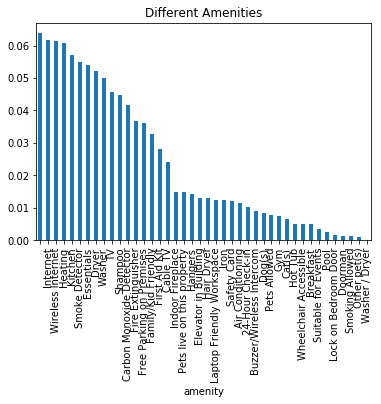

In [69]:
props_amenity_df = clean_and_plot(listings)

As can be observed in the chart above, Entertainment/Connectivity (Internet, TV, Cable TV) and Safety (Smoke Detector, Carbon Monoxide Detector, Fire Extinguisher) seem to rank high among the things the property owners provide.  

Now, I wonder if the type of amenities provided by the property owners depend on the room type in case. Let's take a look.

In the next section, we are further breaking down the analysis above by the room type to see how frequently each amenity is provided in each room type.

In [184]:
def total_count_by_room_type(df, col1, col2, col3, look_for1, look_for2):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = pd.DataFrame(columns = [col1, col2, col3])
    for val1 in look_for1:
        for val2 in look_for2:
            new_df = new_df.append({col1:val1, col2:val2, col3: 0}, ignore_index = True)
            
    #loop through list of ed types
    for val1 in look_for1:
        #loop through rows
        for val2 in look_for2:
            for idx in range(df.shape[0]):
                #if the ed type is in the row add 1
                if val1 in df[col1][idx] and val2 in df[col2][idx]:
                    new_df.loc[(new_df[col1]==val1) & (new_df[col2]==val2), col3] += int(df[col3][idx])
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [185]:
amenities_room_type_df = listings.groupby(['amenities','room_type']).size().reset_index().rename(columns={0:'count'})

In [186]:
amenities_room_type_count_df = total_count_by_room_type(amenities_room_type_df,'room_type','amenities','count',unique_room_types,unique_amenities)

Since some of the entries are null in the listings dataframe, to account for them, we have set all of them to 0 to help us with the heat map we are going to create next which is the case when a certain amenity is not provided by a property, so replacing that with a '0' is reasonable.

In [193]:
amenities_room_type_count_df = amenities_room_type_count_df.fillna(0)

In [200]:
amenities_room_type_count_df[amenities_room_type_count_df['room_type']=='Shared room'].head()

,room_type,amenities,count
87,Shared room,Wireless Internet,110
118,Shared room,Wheelchair Accessible,7
125,Shared room,Washer / Dryer,0
92,Shared room,Washer,100
84,Shared room,TV,36


In [201]:
amenities_room_type_count_df.shape

(126, 3)

In [202]:
amenities_room_type_pivot = amenities_room_type_count_df.pivot('room_type','amenities','count')

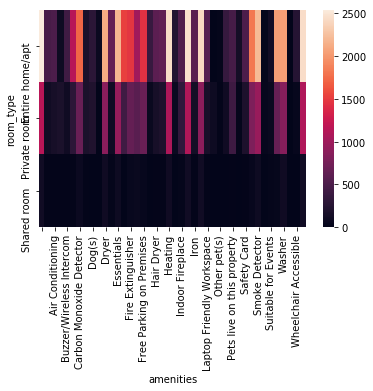

In [203]:
ax = sns.heatmap(amenities_room_type_pivot)

The results in the heat map above are just as one would expect - an average entire home/apt seems to have the max number of amenities available which is followed by a private room and eventually, by a shared room.

Answer 3: ----------------------------------------------------------------------------------------------------------------------

# Question 3: How do super hosts compare with the regular hosts?

In the following section, we have tried to explore how super hosts compare with the regular hosts along a few dimensions that seemed to make the most sense which are 1. how reponsive they are (host_response_time), 2. how frequently do they host (host_listings_count) and 3. how flexible are they when it comes to cancellation (cancellation policy).. 

Approach:
Approach here again is to look some decriptive statistics and create some visuals to see if the trends can be segregated and easily communicated to the business stakeholders.
Also, I have had to remove/replace with 0's some null values in the data wrangling part to make it easy to work with the bar charts. 

In [5]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


Creating a smaller dataframe that only has the columns of interest..

In [6]:
host_data = listings[['host_is_superhost','host_response_time','host_listings_count','cancellation_policy']]

In [7]:
host_data.head()

,host_is_superhost,host_response_time,host_listings_count,cancellation_policy
0,f,within a few hours,3.0,moderate
1,t,within an hour,6.0,strict
2,f,within a few hours,2.0,strict
3,f,NaN,1.0,flexible
4,f,within an hour,2.0,strict


In [8]:
# Dropping any rows that have a null in any cell.
host_data = host_data.dropna(how='any')

In [13]:
response_subset = host_data[['host_is_superhost','host_response_time','host_listings_count']]
response_data_count = response_subset.groupby(['host_is_superhost','host_response_time']).count()

In [14]:
response_data_count = pd.DataFrame(response_data_count)
response_data_count

host_listings_count
host_is_superhost host_response_time                     
f                 a few days or more                   37
                  within a day                        540
                  within a few hours                  770
                  within an hour                     1203
t                 a few days or more                    1
                  within a day                         57
                  within a few hours                  198
                  within an hour                      489

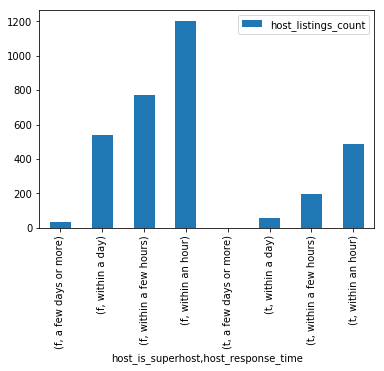

In [15]:
response_data_count.plot(kind='bar')

In [16]:
response_data_mean = response_subset.groupby(['host_is_superhost','host_response_time']).mean()
response_data_mean

host_listings_count
host_is_superhost host_response_time                     
f                 a few days or more             1.540541
                  within a day                   4.457407
                  within a few hours            11.812987
                  within an hour                 9.483791
t                 a few days or more             1.000000
                  within a day                   1.456140
                  within a few hours             1.752525
                  within an hour                 6.803681

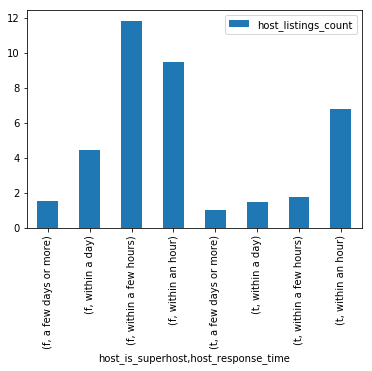

In [17]:
response_data_mean.plot(kind='bar')

Just looking at the response time for the different host types, it's clear that the super hosts tend to respond much faster on average compared to a regular host as the chart is clearly much heavyly skewed towards the 'within an hour' bucket for the super hosts and end up taking more bookings.

In the next section, we have tried to compare the cancellation policy of the two host types.

In [22]:
cancellation_subset = host_data[['host_is_superhost','cancellation_policy','host_listings_count']]
cancellation_data_count = cancellation_subset.groupby(['host_is_superhost','cancellation_policy']).count()

In [23]:
cancellation_data_count = pd.DataFrame(cancellation_data_count)
cancellation_data_count

host_listings_count
host_is_superhost cancellation_policy                     
f                 flexible                             766
                  moderate                             807
                  strict                               977
t                 flexible                             132
                  moderate                             287
                  strict                               326

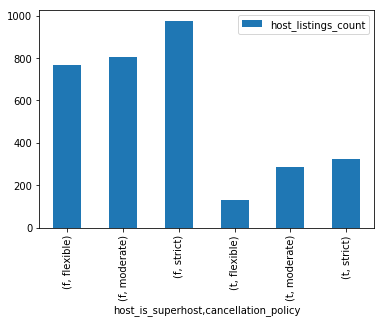

In [24]:
cancellation_data_count.plot(kind='bar')

In [25]:
cancellation_data_mean = cancellation_subset.groupby(['host_is_superhost','cancellation_policy']).mean()
cancellation_data_mean = pd.DataFrame(cancellation_data_mean)
cancellation_data_mean

host_listings_count
host_is_superhost cancellation_policy                     
f                 flexible                        1.766319
                  moderate                        3.204461
                  strict                         19.477994
t                 flexible                        1.643939
                  moderate                        1.655052
                  strict                          9.404908

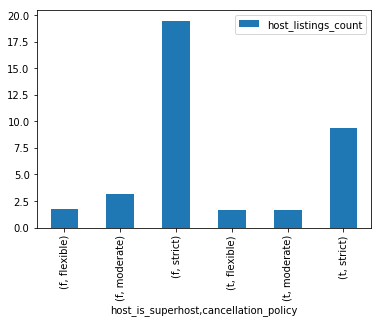

In [26]:
cancellation_data_mean.plot(kind='bar')

From the chart above, it can be observed that while on the whole, most of the property owners tend to be on the strict end when it comes to their cancellation policies, super hosts on average seem to have a slightly higher relative fraction on the flexible end. However, it can be safely concluded that the cancellation policy doesn't seem to have a huge bearing on whether someone becomes a super host or not.